In [1]:
import sys, os
sys.path.append(os.path.abspath('../'))
import argparse, logging, sys
import ptp.reader
import ptp.ls
import ptp.metrics
import ptp.pktselection
import ptp.kalman
import ptp.frequency
import ptp.window
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
filename   = "../data/serial-20190813-185308.json"
N_ls       = 105
freq_delta = 64
N_movavg   = 16
N_median   = 16
N_min      = 16
N_mode     = 16
N_ewma     = 16
T_ns       = 1e9/4

In [3]:
reader = ptp.reader.Reader(filename)
reader.run()

In [4]:
# Raw frequency estimations (differentiation of raw time offset measurements)
freq_estimator = ptp.frequency.Estimator(reader.data, delta=freq_delta)
freq_estimator.process()
freq_estimator.set_truth(delta=freq_delta)

In [5]:
# Least-squares estimator
ls = ptp.ls.Ls(N_ls, reader.data, T_ns)
ls.process("eff")

In [6]:
# Kalman
# kalman = ptp.kalman.Kalman(reader.data, T_ns/1e9)
kalman = ptp.kalman.Kalman(reader.data, T_ns/1e9,
                           trans_cov = [[1, 0], [0, 1e-2]],
                           obs_cov = [[1e4, 0], [0, 1e2]])
kalman.process()

In [7]:
pkts = ptp.pktselection.PktSelection(N_movavg, reader.data)

In [8]:
# Moving average
pkts.process("average", avg_impl="recursive")

In [9]:
# Sample-median
pkts.set_window_len(N_median)
pkts.process("median")

In [10]:
# Sample-minimum
pkts.set_window_len(N_min)
pkts.process("min", ls_impl="eff")

In [11]:
# Exponentially weighted moving average
pkts.set_window_len(N_ewma)
pkts.process("ewma")

In [12]:
# Sample-mode
pkts.set_window_len(N_mode)
pkts.process("mode", ls_impl="eff")

New bin: 20
New bin: 30
New bin: 40
New bin: 50
New bin: 60
New bin: 70
New bin: 80
New bin: 90
New bin: 100
New bin: 110
New bin: 120


In [13]:
# PTP analyser
analyser = ptp.metrics.Analyser(reader.data)

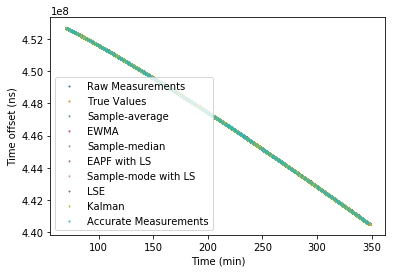

In [14]:
analyser.plot_toffset_vs_time(save=False)

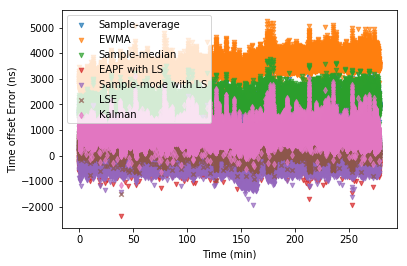

In [15]:
analyser.plot_toffset_err_vs_time(show_raw = False, save=False)

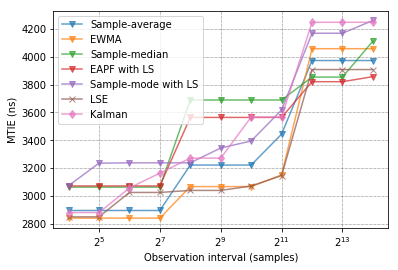

In [16]:
analyser.plot_mtie(show_raw = False, save=False)

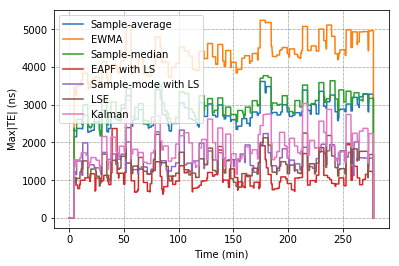

In [17]:
analyser.plot_max_te(show_raw=False, window_len = 1000, save=False)

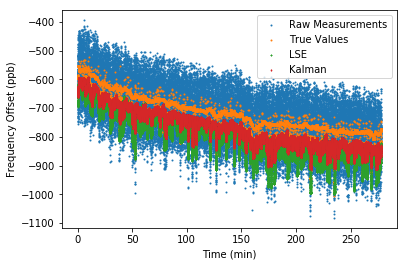

In [18]:
analyser.plot_foffset_vs_time(save=False)

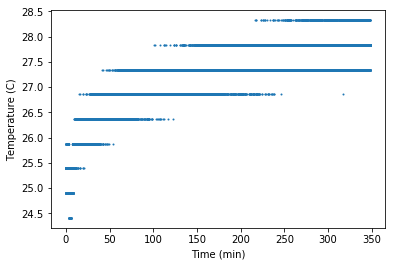

In [19]:
analyser.plot_temperature(save=False)

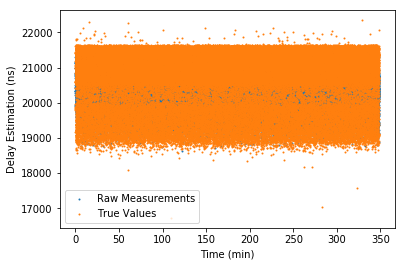

In [20]:
analyser.plot_delay_vs_time(save=False)

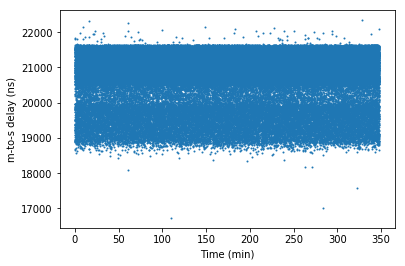

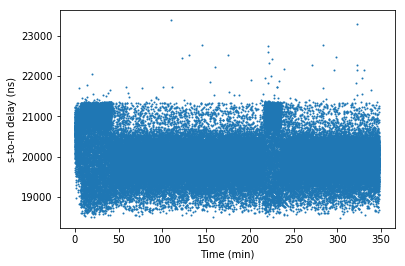

In [21]:
analyser.plot_delay_vs_time(split=True, save=False)

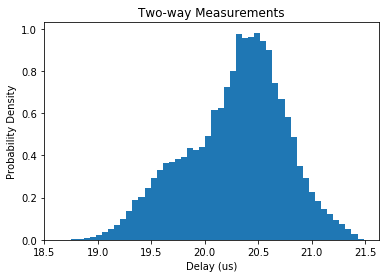

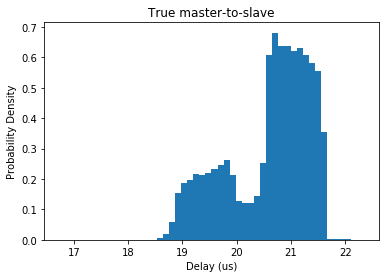

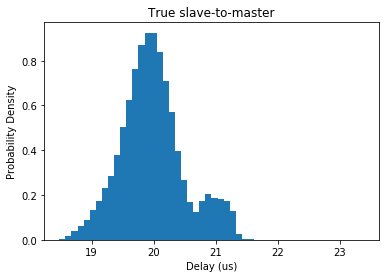

In [22]:
analyser.plot_delay_hist(n_bins=50, split=True, save=False)

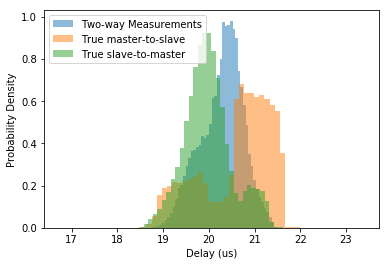

In [23]:
analyser.plot_delay_hist(n_bins=50, save=False)

No handles with labels found to put in legend.


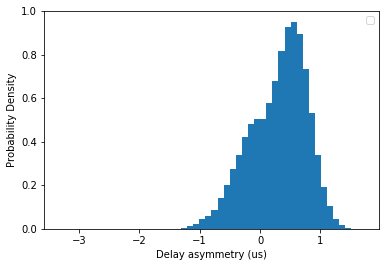

In [24]:
analyser.plot_delay_asym_hist(n_bins=50, save=False)

In [25]:
analyser.delay_asymmetry()

Metric 	      m-to-s	      s-to-m	   asymmetry
Average	 20597.40 ns	 19988.54 ns	   304.43 ns
Minimum	 16732.00 ns	 18481.00 ns	  -874.50 ns
Maximum	 22338.00 ns	 23385.00 ns	  -523.50 ns
Median	 20800.00 ns	 19952.00 ns	   424.00 ns


In [ ]:
analyser.plot_delay_asym_vs_time(save=False)